## Подготовка датасетов с признаками

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import create_client_profile_features, get_input, one_hot_encode

### preparation bki 

In [2]:
bki = get_input('../data/bki.csv')

../data/bki.csv: shape = 945234 rows, 17 cols


In [3]:
bki = one_hot_encode(bki)

In [4]:
bki.columns

Index(['application_number', 'bureau_id', 'days_credit', 'credit_day_overdue',
       'days_credit_enddate', 'days_enddate_fact', 'amt_credit_max_overdue',
       'cnt_credit_prolong', 'amt_credit_sum', 'amt_credit_sum_debt',
       'amt_credit_sum_limit', 'amt_credit_sum_overdue', 'days_credit_update',
       'amt_annuity', 'x0_Active', 'x0_Bad debt', 'x0_Closed', 'x0_Sold',
       'x1_currency 1', 'x1_currency 2', 'x1_currency 3', 'x1_currency 4',
       'x2_Another type of loan', 'x2_Car loan',
       'x2_Cash loan (non-earmarked)', 'x2_Consumer credit', 'x2_Credit card',
       'x2_Loan for business development',
       'x2_Loan for purchase of shares (margin lending)',
       'x2_Loan for the purchase of equipment',
       'x2_Loan for working capital replenishment', 'x2_Microloan',
       'x2_Mobile operator loan', 'x2_Mortgage', 'x2_Real estate loan',
       'x2_Unknown type of loan'],
      dtype='object')

In [5]:
feat_for_plot = ['application_number', 'bureau_id', 'days_credit', 'credit_day_overdue',
                 'days_credit_enddate', 'days_enddate_fact', 'amt_credit_max_overdue',
                 'cnt_credit_prolong', 'amt_credit_sum', 'amt_credit_sum_debt',
                 'amt_credit_sum_limit', 'amt_credit_sum_overdue', 'days_credit_update',
                 'amt_annuity']

In [6]:
len(feat_for_plot)/4

3.5

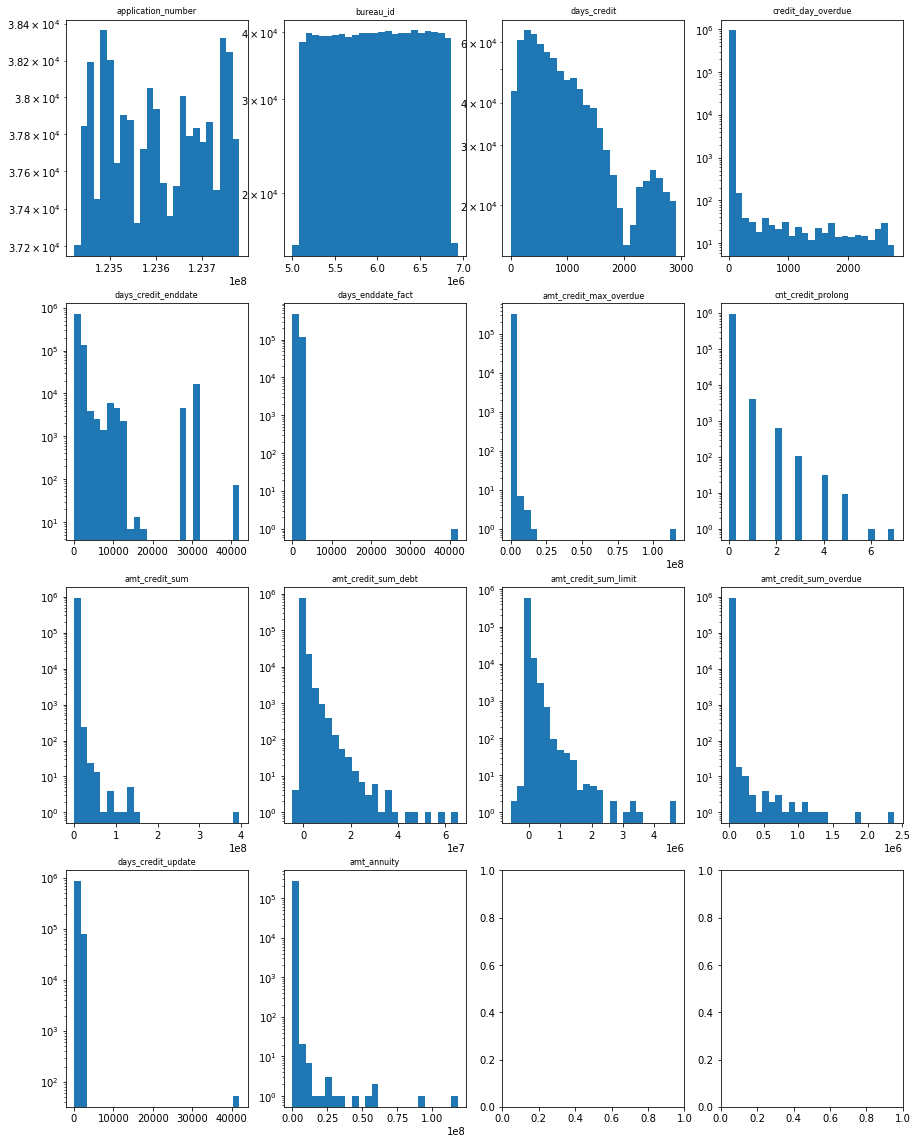

In [7]:
in_line = 4

fig, axes = plt.subplots(4, in_line, figsize=(15, 5*4))

for num, feature in enumerate(bki[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(bki[feature].copy(), bins=25)
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [8]:
#поменяем масштабирование некоторых признаков
bki['amt_credit_sum'] = np.log(bki['amt_credit_sum'] + 100)
bki['amt_credit_sum_debt'] = np.log(bki['amt_credit_sum_debt'] + 1000)
bki['amt_credit_sum_limit'] = np.log(bki['amt_credit_sum_limit'] + 1000)
bki['amt_credit_sum_overdue'] = np.log(bki['amt_credit_sum_overdue'] + 1000)

/home/svet/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


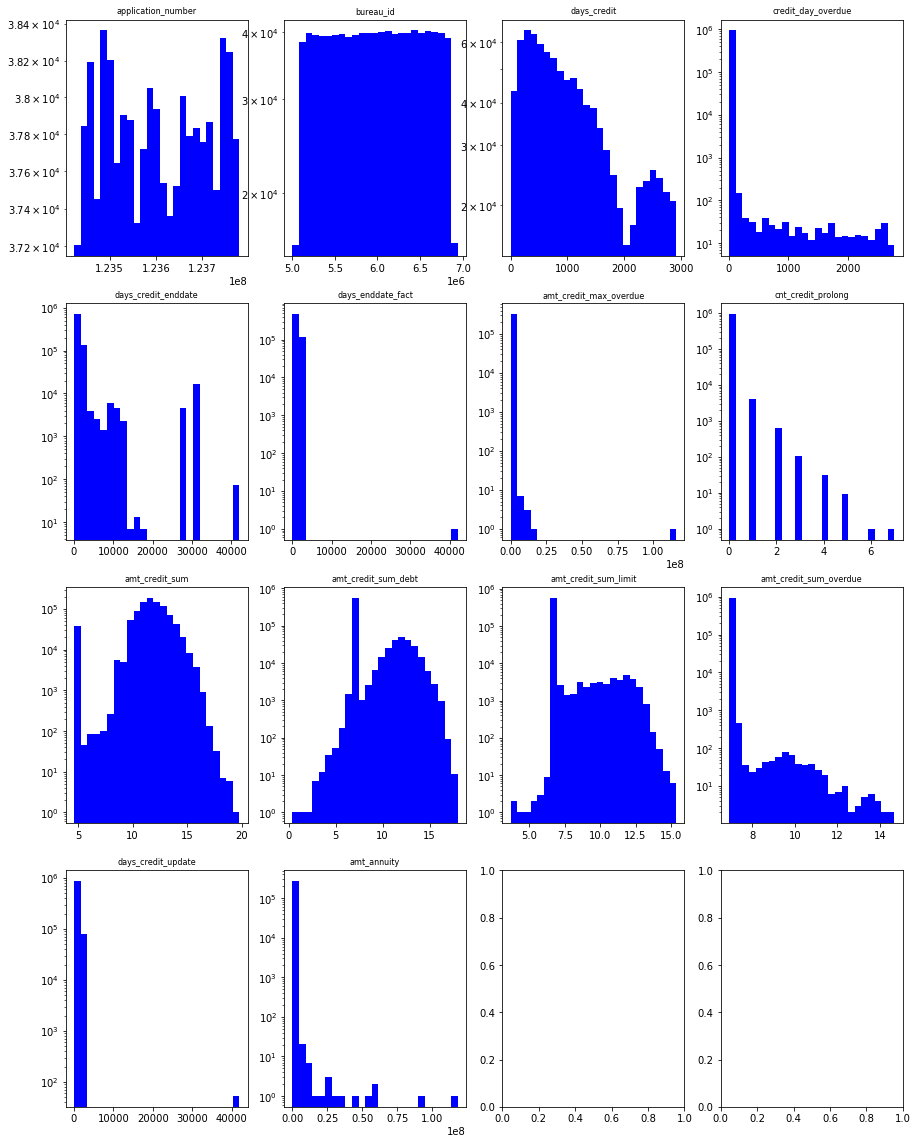

In [9]:
in_line = 4

fig, axes = plt.subplots(4, in_line, figsize=(15, 4*5))

for num, feature in enumerate(bki[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(bki[feature].copy(), bins=25, color="blue")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [10]:
bki.to_csv('../data/bki_prep.csv', index=False)

### preparation client profile

In [11]:
client_profile = get_input('../data/client_profile.csv')

../data/client_profile.csv: shape = 250000 rows, 24 cols


In [12]:
#добавляем признаки
client_profile = create_client_profile_features(client_profile)

/home/svet/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [13]:
client_profile = one_hot_encode(client_profile)

In [14]:
client_profile.columns

Index(['application_number', 'childrens', 'total_salary', 'amount_credit',
       'amount_annuity', 'region_population', 'age', 'days_on_last_job',
       'own_car_age', 'flag_phone', 'flag_email', 'family_size',
       'external_scoring_rating_1', 'external_scoring_rating_2',
       'external_scoring_rating_3', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year', 'bki_requests_count', 'bki_kurtosis',
       'external_scoring_prod', 'external_scoring_weighted',
       'external_scoring_rating_min', 'external_scoring_rating_max',
       'external_scoring_rating_mean', 'external_scoring_rating_nanmedian',
       'external_scoring_rating_var', 'ratio_credit_to_annuity',
       'ratio_annuity_to_salary', 'ratio_credit_to_salary',
       'ratio_annuity_to_age', 'ratio_credit_to_age', 'ratio_salary_to_age',
       'ratio_salary_to_region_population'

In [16]:
for i, x in enumerate(np.max(client_profile)):
    if x == np.inf:
        col = client_profile.columns[i]
        client_profile[col] = client_profile[client_profile[col] != np.inf][col].min()

In [17]:
feat_for_plot = ['application_number', 'childrens', 'total_salary', 'amount_credit',
               'amount_annuity', 'region_population', 'age', 'days_on_last_job',
               'own_car_age', 'flag_phone', 'flag_email', 'family_size',
               'external_scoring_rating_1', 'external_scoring_rating_2',
               'external_scoring_rating_3', 'amt_req_credit_bureau_hour',
               'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
               'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
               'amt_req_credit_bureau_year', 'bki_requests_count', 'bki_kurtosis',
               'external_scoring_prod', 'external_scoring_weighted',
               'external_scoring_rating_min', 'external_scoring_rating_max',
               'external_scoring_rating_mean', 'external_scoring_rating_nanmedian',
               'external_scoring_rating_var', 'ratio_credit_to_annuity',
               'ratio_annuity_to_salary', 'ratio_credit_to_salary',
               'ratio_annuity_to_age', 'ratio_credit_to_age', 'ratio_salary_to_age',
               'ratio_salary_to_region_population', 'ratio_car_to_experience',
               'ratio_car_to_age', 'expected_total_loss_1', 'expected_total_loss_2',
               'expected_total_loss_3', 'expected_monthly_loss_1',
               'expected_monthly_loss_2', 'expected_monthly_loss_3']

In [19]:
len(feat_for_plot)/4

11.25

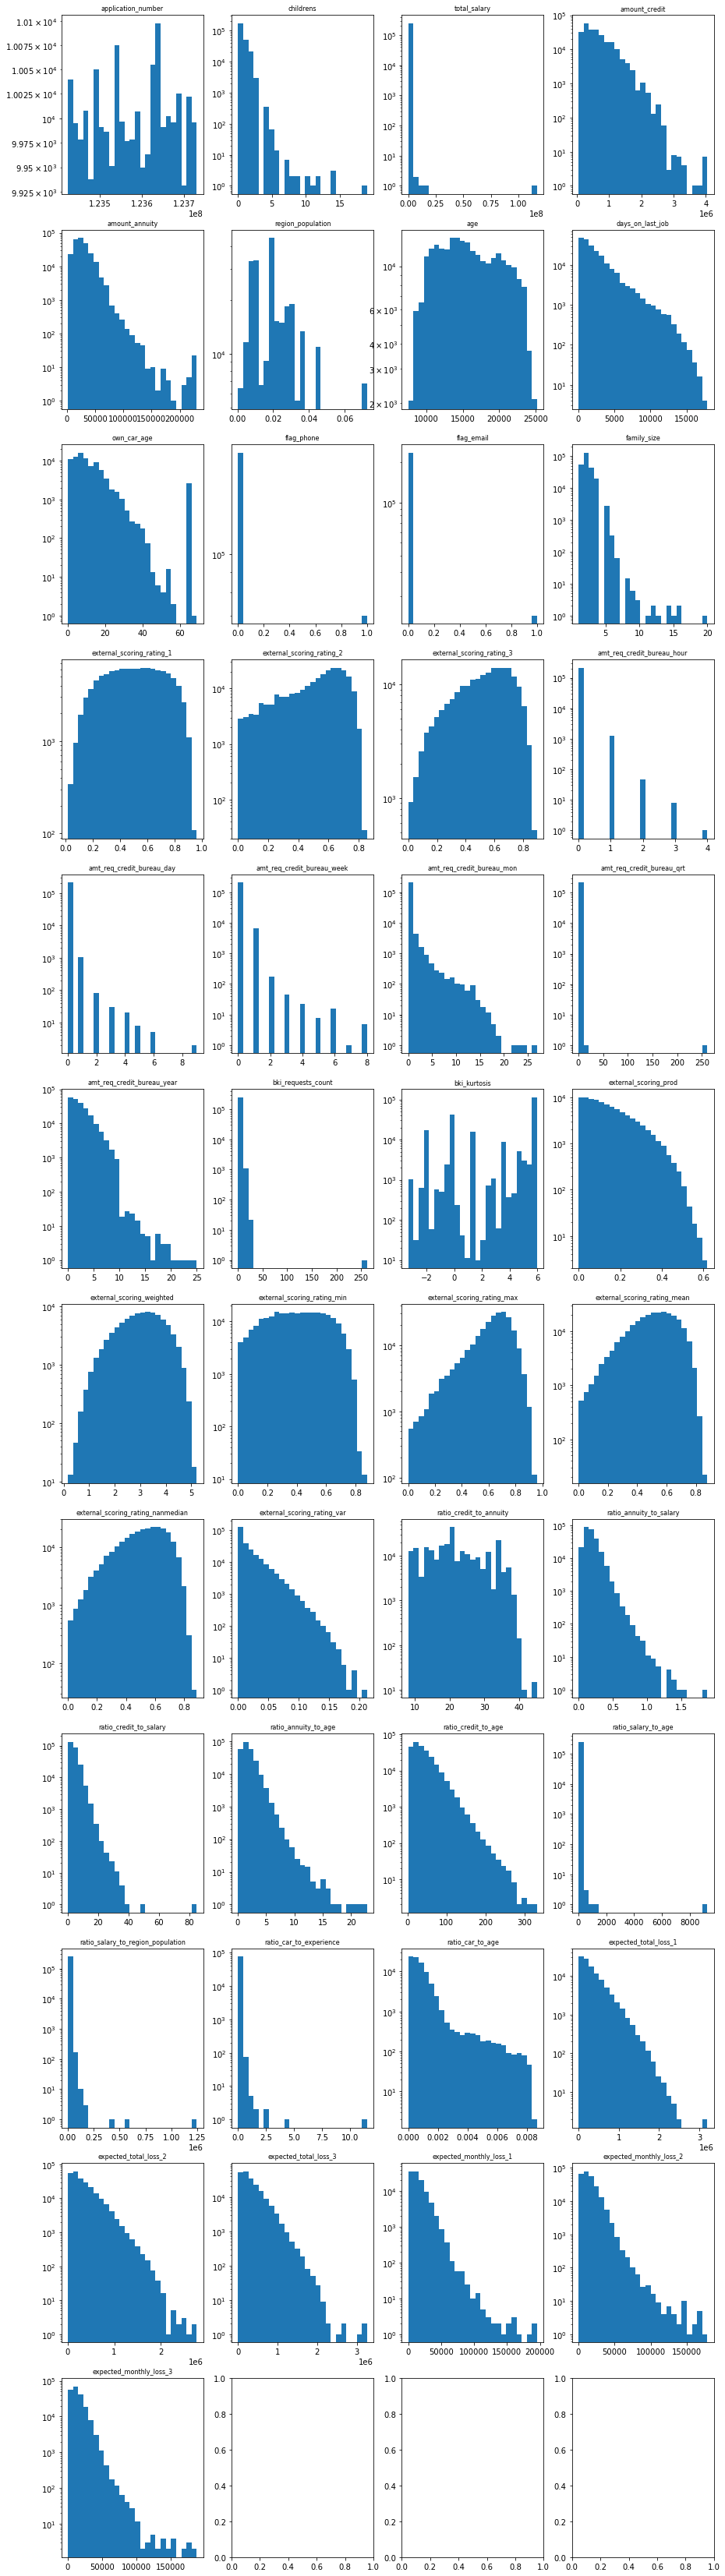

In [21]:
in_line = 4

fig, axes = plt.subplots(12, in_line, figsize=(15, 12*5))

for num, feature in enumerate(client_profile[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(client_profile[feature].copy(), bins=25)
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [22]:
#изменим масштабирование некоторых признаков
client_profile['amount_credit'] = np.log(client_profile['amount_credit'] + 10)
client_profile['amount_annuity'] = np.log(client_profile['amount_annuity'] + 10)
client_profile['days_on_last_job'] = np.log(client_profile['days_on_last_job'] + 100)
client_profile['own_car_age'] = np.log(client_profile['own_car_age'] + 1)
client_profile['amt_req_credit_bureau_mon'] = np.log(client_profile['amt_req_credit_bureau_mon'] + 10)
client_profile['amt_req_credit_bureau_year'] = np.log(client_profile['amt_req_credit_bureau_year'] + 10)
client_profile['expected_total_loss_1'] = np.log(client_profile['expected_total_loss_1'] + 1)
client_profile['expected_total_loss_2'] = np.log(client_profile['expected_total_loss_2'] + 100)
client_profile['expected_total_loss_3'] = np.log(client_profile['expected_total_loss_3'] + 1)
client_profile['expected_monthly_loss_1'] = np.log(client_profile['expected_monthly_loss_1'] + 1)
client_profile['expected_monthly_loss_2'] = np.log(client_profile['expected_monthly_loss_2'] + 10)
client_profile['expected_monthly_loss_3'] = np.log(client_profile['expected_monthly_loss_3'] + 11)

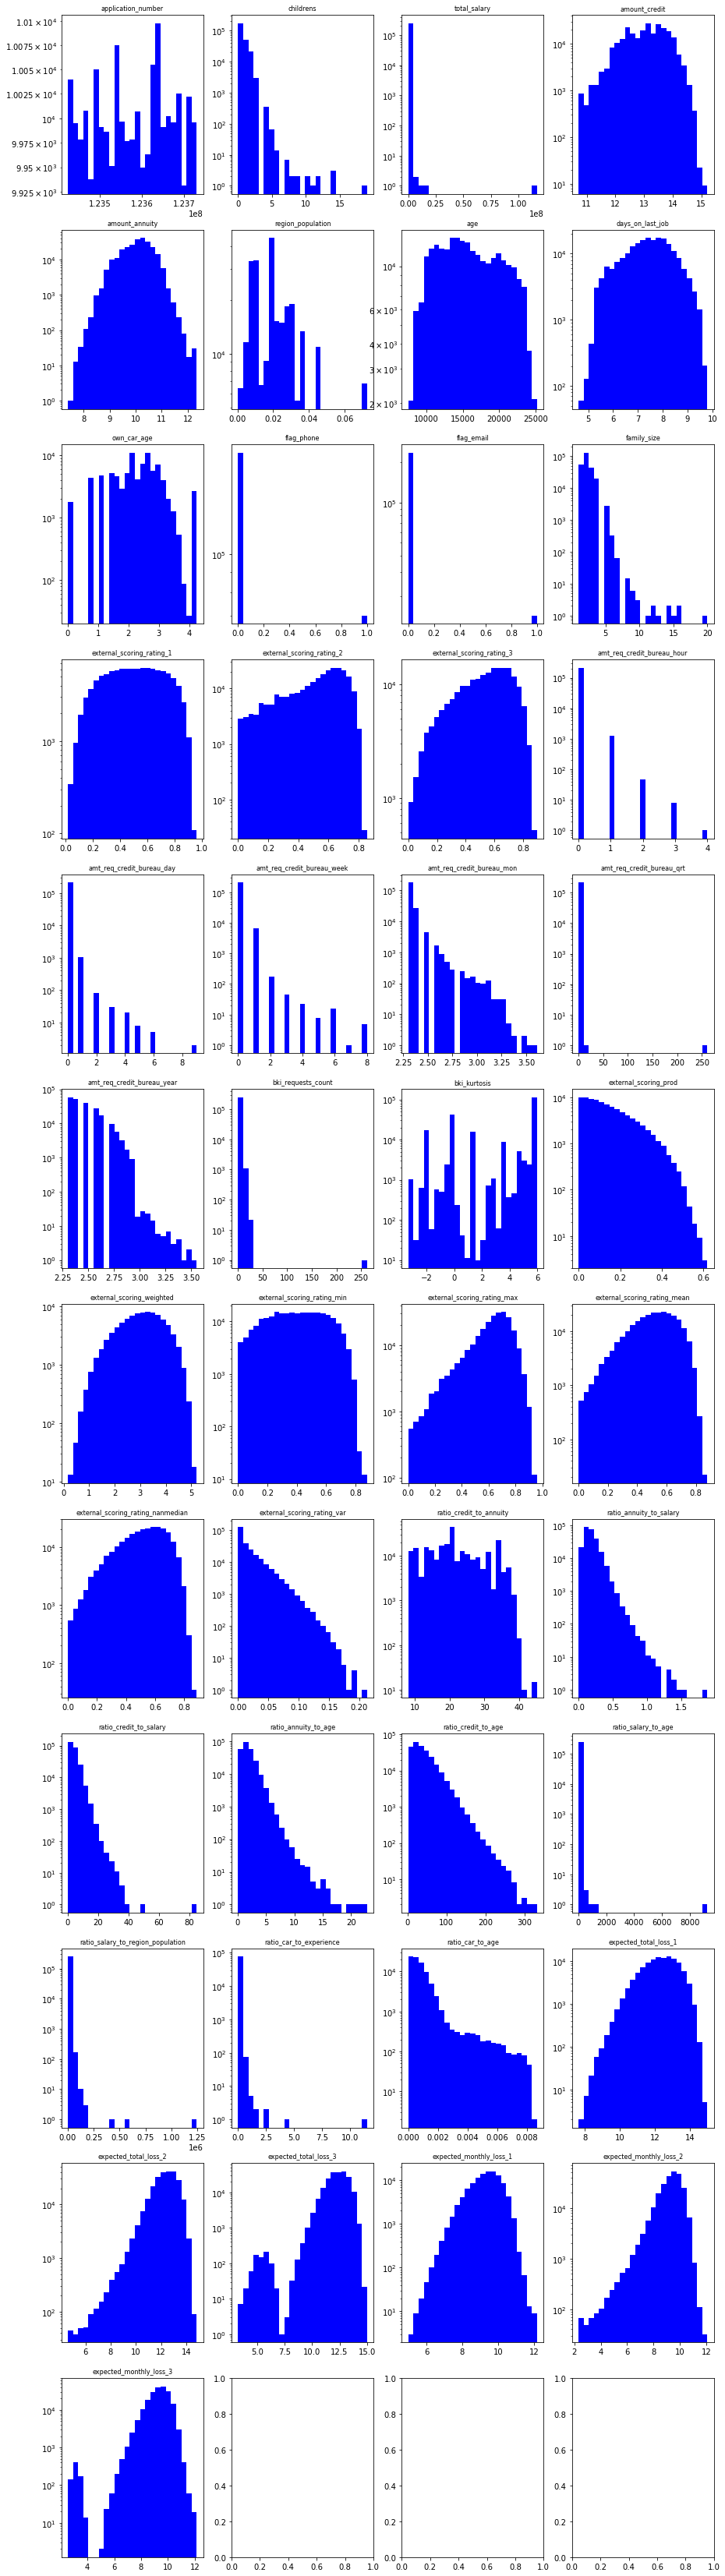

In [23]:
in_line = 4

fig, axes = plt.subplots(12, in_line, figsize=(15, 12*5))

for num, feature in enumerate(client_profile[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(client_profile[feature].copy(), bins=25, color="blue")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [40]:
client_profile.to_csv('../data/client_prep.csv', index=False)

### preparation payments

In [24]:
payments = get_input('../data/payments.csv')

../data/payments.csv: shape = 1023932 rows, 8 cols


In [25]:
payments = one_hot_encode(payments)

In [26]:
payments.columns

Index(['prev_application_number', 'application_number',
       'num_instalment_version', 'num_instalment_number', 'days_instalment',
       'days_entry_payment', 'amt_instalment', 'amt_payment'],
      dtype='object')

In [27]:
feat_for_plot = ['prev_application_number', 'application_number',
       'num_instalment_version', 'num_instalment_number', 'days_instalment',
       'days_entry_payment', 'amt_instalment', 'amt_payment']

In [28]:
len(feat_for_plot) / 4

2.0

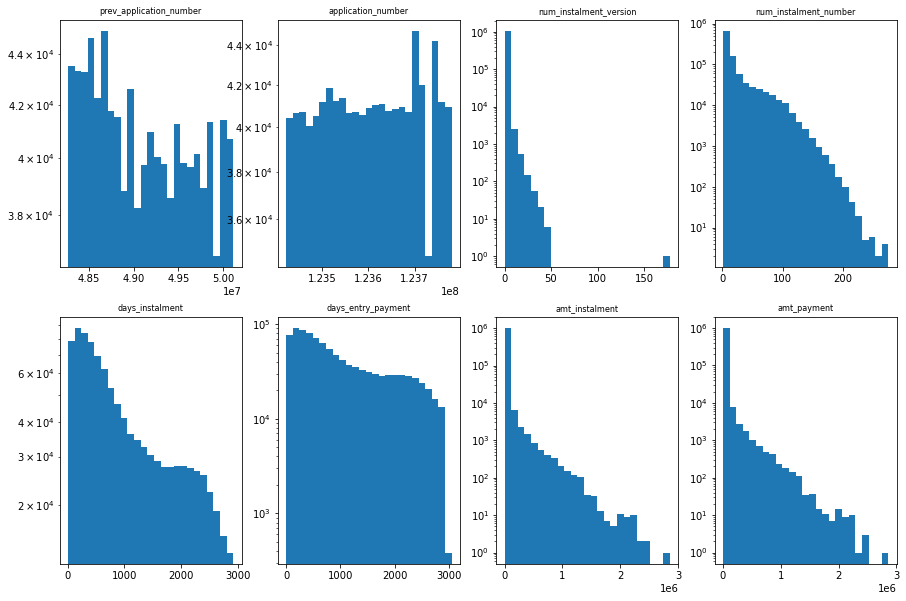

In [29]:
in_line = 4

fig, axes = plt.subplots(2, in_line, figsize=(15, 2*5))

for num, feature in enumerate(payments[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(payments[feature].copy(), bins=25)
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [30]:
#масштабирование некоторых признаков
payments['amt_instalment'] = np.log(payments['amt_instalment'] + 10)
payments['amt_payment'] = np.log(payments['amt_payment'] + 10)
payments['num_instalment_version'] = np.log(payments['num_instalment_version'] + 1)

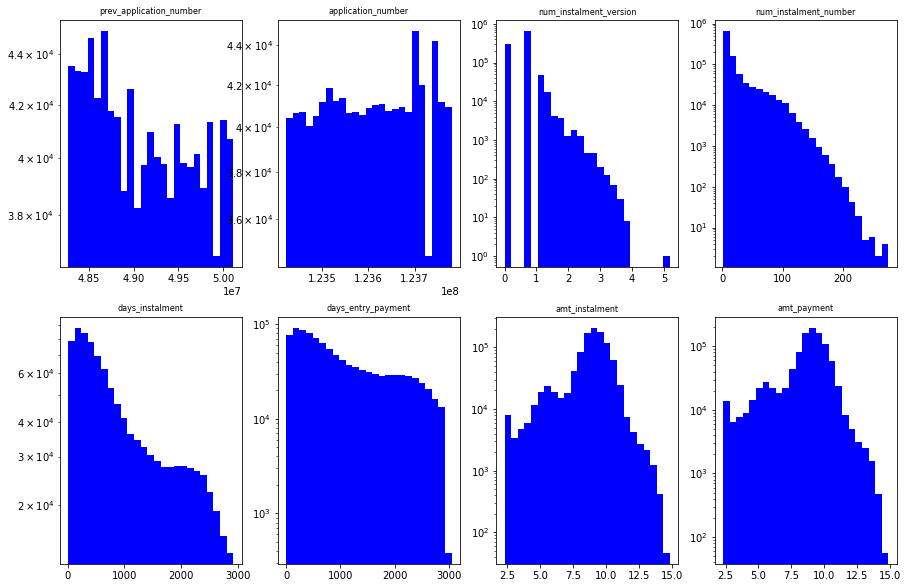

In [31]:
in_line = 4

fig, axes = plt.subplots(2, in_line, figsize=(15, 2*5))

for num, feature in enumerate(payments[feat_for_plot]):
    axes[num//in_line, num%in_line].hist(payments[feature].copy(), bins=25, color="blue")
    axes[num//in_line, num%in_line].set_yscale('log')
    axes[num//in_line, num%in_line].set_title(feature, fontsize=8)

In [46]:
payments.to_csv('../data/payments_prep.csv', index=False)

### preparation history

In [32]:
history = get_input('../data/applications_history.csv')

../data/applications_history.csv: shape = 1670214 rows, 26 cols


In [33]:
#пропуски заменяем на 0
history = history.fillna(0)

In [34]:
for col in ['name_contract_type', 'name_type_suite']:
    history[col] = history[col].apply(str)

In [35]:
history = one_hot_encode(history)

In [36]:
history.to_csv('../data/history_prep.csv', index=False)

In [37]:
#подсчет количества предыдуших операций
previous_app_counts = history.groupby("application_number", as_index=False)\
                      .agg({"prev_application_number" : "count"})\
                      .rename(columns={"prev_application_number": "prev_application_count"})

In [38]:
previous_app_counts.to_csv('../data/app_prev_number.csv', index=False)